In [74]:
import pandas as pd
df = pd.read_csv('SuicTweets.csv')
df.head()

,tweet,intention
0,my life is meaningless i just want to end my l...,1
1,muttering i wanna die to myself daily for a fe...,1
2,work slave i really feel like my only purpose ...,1
3,i did something on the 2 of october i overdose...,1
4,i feel like no one cares i just want to die ma...,1


In [75]:
import re
import nltk
import numpy as np
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')
stopwords_en = stopwords.words('english')
lemmatizer = WordNetLemmatizer()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\juane\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\juane\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\juane\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [76]:
mapper = {
    1: 'Suicide',
    0: 'Non-suicide'
}
df['etiqueta'] = df['intention'].map(mapper)
df.head()

,tweet,intention,etiqueta
0,my life is meaningless i just want to end my l...,1,Suicide
1,muttering i wanna die to myself daily for a fe...,1,Suicide
2,work slave i really feel like my only purpose ...,1,Suicide
3,i did something on the 2 of october i overdose...,1,Suicide
4,i feel like no one cares i just want to die ma...,1,Suicide


In [77]:
import contractions
from tqdm import tqdm
tqdm.pandas()

def preprocesamiento_texto(texto):
    texto = texto.lower()
    texto = contractions.fix(texto)
    texto = re.sub(r'[^a-z\s]','', texto)
    texto_tokenized = word_tokenize(texto)
    texto_no_stop = [token for token in texto_tokenized if token not in stopwords_en]
    final = [lemmatizer.lemmatize (word) for word in texto_no_stop]
    final = ' '.join(final)
    return final

In [78]:
df['clean_tweet'] = df['tweet'].progress_apply(preprocesamiento_texto)
df.head()

100%|██████████| 9119/9119 [00:04<00:00, 2176.30it/s]


,tweet,intention,etiqueta,clean_tweet
0,my life is meaningless i just want to end my l...,1,Suicide,life meaningless want end life badly life comp...
1,muttering i wanna die to myself daily for a fe...,1,Suicide,muttering want die daily month feel worthless ...
2,work slave i really feel like my only purpose ...,1,Suicide,work slave really feel like purpose life make ...
3,i did something on the 2 of october i overdose...,1,Suicide,something october overdosed felt alone horribl...
4,i feel like no one cares i just want to die ma...,1,Suicide,feel like one care want die maybe feel le lonely


In [79]:
x = df['clean_tweet']
y = df['intention']

In [80]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, train_size=0.7,random_state=101)

In [81]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [82]:
tfidf_vectorizer = TfidfVectorizer()
x_train_vectorized = tfidf_vectorizer.fit_transform(x_train)
x_test_vectorized = tfidf_vectorizer.transform(x_test)

In [83]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

              precision    recall  f1-score   support

           0       0.90      0.95      0.92      1559
           1       0.93      0.86      0.89      1177

    accuracy                           0.91      2736
   macro avg       0.91      0.90      0.91      2736
weighted avg       0.91      0.91      0.91      2736



<Axes: >

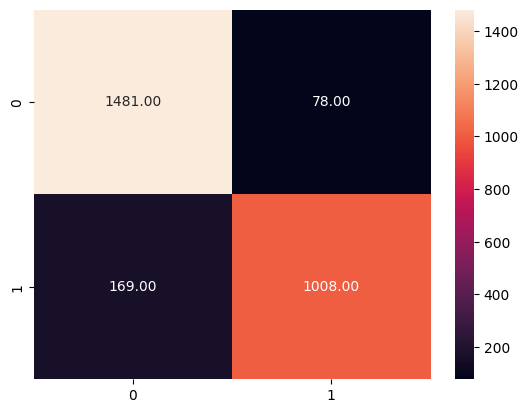

In [84]:
model_1 = SVC()
model_1.fit(x_train_vectorized, y_train)
y_pred = model_1.predict(x_test_vectorized)

print(classification_report(y_test, y_pred))

sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='.2f')

              precision    recall  f1-score   support

           0       0.89      0.87      0.88      1559
           1       0.84      0.86      0.85      1177

    accuracy                           0.87      2736
   macro avg       0.86      0.87      0.86      2736
weighted avg       0.87      0.87      0.87      2736



<Axes: >

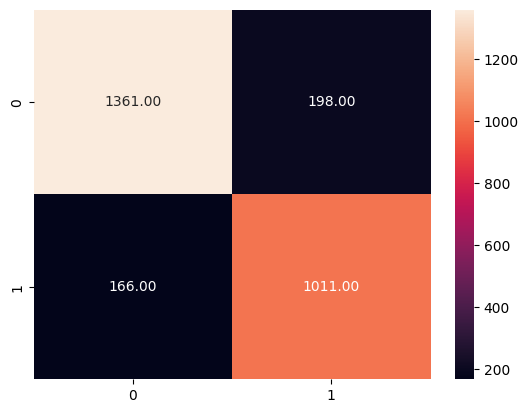

In [85]:
model_2 = SVC(C=100, kernel='linear')
model_2.fit(x_train_vectorized, y_train)
y_pred = model_2.predict(x_test_vectorized)

print(classification_report(y_test, y_pred))

sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='.2f')